In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
import time
import requests

# Setup ChromeDriver
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)

# URL of the page to scrape
url = 'https://www.vtb.ru/personal/vklady-i-scheta/obezlichennyj-metallicheskij-schet/'

sell_price_ru_rub = 0
buy_price_ru_rub = 0

try:
    # Navigate to the page
    driver.get(url)
    
    # Wait for the dynamic content to load
    time.sleep(15)  # Increase the sleep time if slow internet
    
    # Find all price data elements using their class (adjust if necessary)
    price_elements = driver.find_elements(By.CSS_SELECTOR, 'p.typographystyles__Box-foundation-kit__sc-14qzghz-0.jEFSaq.numbersstyles__TypographyTitle-foundation-kit__sc-1xhbrzd-4.haHdlc')
    
    # Assuming the first element is the sell price and the second is the buy price
    if len(price_elements) >= 2:
        sell_price_ru_rub = price_elements[0].text.replace(" ", "").replace(",", ".")
        buy_price_ru_rub = price_elements[1].text.replace(" ", "").replace(",", ".")
        print(f'Sell price: {sell_price_ru_rub}')
        print(f'Buy price: {buy_price_ru_rub}')
    else:
        print('Price data not found.')
finally:
    # Close the browser
    driver.quit()

service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)

# URL of the page to scrape
url = 'https://bullionexchanges.com/sell-to-us/bars'

buy_price_usa = 0
sell_price_usa = 0

try:
    # Navigate to the page
    driver.get(url)
    
    # Wait for the dynamic content to load
    time.sleep(10)  # Adjust the sleep time if necessary
    
    # Find all price data elements using their class
    price_elements = driver.find_elements(By.CLASS_NAME, 'price-alZZ')
    
    # Assuming the first element is the buy price and the second is the sell price
    if len(price_elements) >= 2:
        buy_price_usa = price_elements[0].text.replace("$", "").replace(",", "")
        sell_price_usa = price_elements[1].text.replace("$", "").replace(",", "")
        print(f'Buy price: {buy_price_usa}')
        print(f'Sell price: {sell_price_usa}')
    else:
        print('Price data not found.')
finally:
    # Close the browser
    driver.quit()

# Conversion factor from ounces to grams
oz_to_grams = 28.3495

# Convert the string prices to floats
buy_price_usa = float(buy_price_usa)
sell_price_usa = float(sell_price_usa)

def convert_price_oz_to_gram(price_per_oz):
    """Converts price from per ounce to per gram."""
    return price_per_oz / oz_to_grams

# Convert buy and sell prices to per gram
buy_price_usa_gram_usd = convert_price_oz_to_gram(buy_price_usa)
sell_price_usa_gram_usd = convert_price_oz_to_gram(sell_price_usa)

print(f'Buy price per gram: ${buy_price_usa_gram_usd:.2f}')
print(f'Sell price per gram: ${sell_price_usa_gram_usd:.2f}')

def get_usd_rub_exchange_rate():
    # URL for the ExchangeRate-API to get the latest exchange rates
    url = "https://api.exchangerate-api.com/v4/latest/USD"

    try:
        # Make a GET request to the API
        response = requests.get(url)
        response.raise_for_status()  # Raises an HTTPError if the response status code is 4XX/5XX

        # Parse the response JSON
        data = response.json()

        # Get the USD to RUB exchange rate
        usd_to_rub = data['rates']['RUB']
        return usd_to_rub
    except requests.RequestException as e:
        print(f"Error fetching exchange rate: {e}")
        return None

# Example usage
exchange_rate = get_usd_rub_exchange_rate()
if exchange_rate is not None:
    print(f"USD/RUB exchange rate: {exchange_rate}")
else:
    print("Failed to retrieve the exchange rate.")

buy_price_ru_rub_normalized = float(buy_price_ru_rub)

# Convert the cost of buying in Russia to USD
cost_in_usd = buy_price_ru_rub_normalized / exchange_rate

# Calculate P&L per gram
profit_per_gram_usd = buy_price_usa_gram_usd - cost_in_usd

print("Price per gram AU in Russia:", "${:.2f}".format(buy_price_ru_rub_normalized))
print("Price per gram AU in USA:", "${:.2f}".format(sell_price_usa_gram_usd))
print("Profit per gram in USD:", "${:.2f}".format(profit_per_gram_usd))

Sell price: 6316.12
Buy price: 6898.90
Buy price: 2354.50
Sell price: 2366.50
Buy price per gram: $83.05
Sell price per gram: $83.48
USD/RUB exchange rate: 88.57
Price per gram AU in Russia: $6898.90
Price per gram AU in USA: $83.48
Profit per gram in USD: $5.16


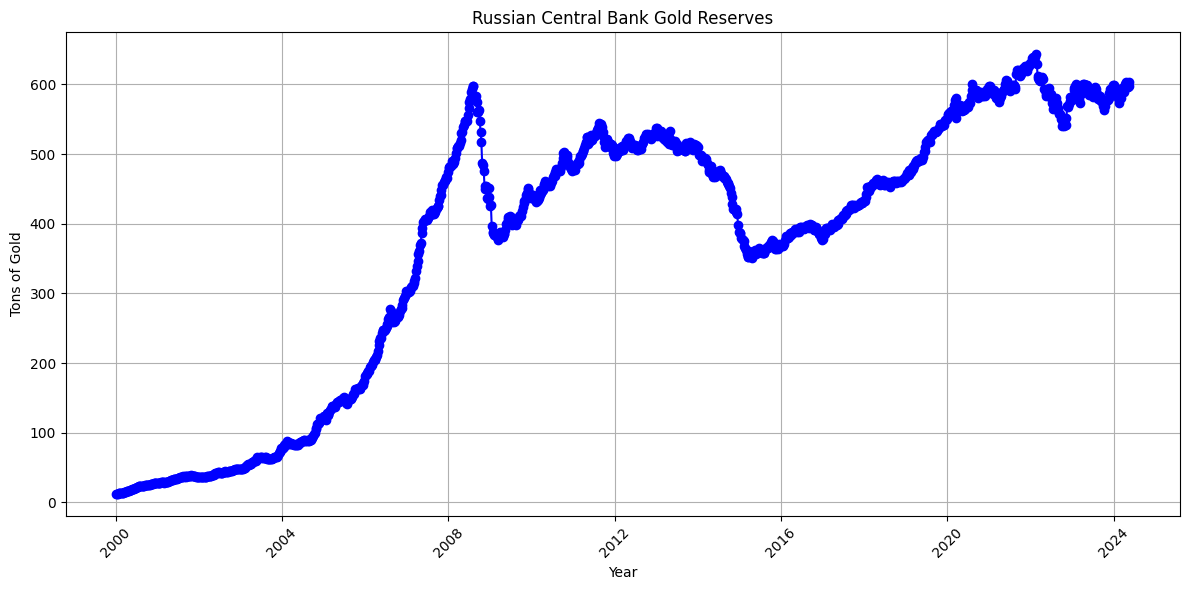

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# URL of the webpage containing the data
url = "https://www.cbr.ru/hd_base/mrrf/mrrf_7d/?UniDbQuery.Posted=True&UniDbQuery.From=01.2000&UniDbQuery.To=05.2024"

# Send a request to fetch the HTML content of the page
response = requests.get(url)
response.raise_for_status()  # Ensure we notice bad responses

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# Find the table containing the data
table = soup.find("table", class_="data")

# Extract the table rows
rows = table.find_all("tr")

# Initialize lists to hold the dates and volumes
dates = []
volumes = []

# Iterate over the table rows and extract the data
for row in rows[1:]:  # Skip the header row
    cells = row.find_all("td")
    date = cells[0].text.strip()
    volume = cells[1].text.strip().replace(",", ".")
    
    dates.append(date)
    volumes.append(float(volume))

# Create a DataFrame from the extracted data
data = pd.DataFrame({"Date": pd.to_datetime(dates, format='%d.%m.%Y'), "Volume": volumes})

# Sort the DataFrame by date
data = data.sort_values(by="Date")

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(data["Date"], data["Volume"], marker='o', linestyle='-', color='b')
plt.title("Russian Central Bank Gold Reserves")
plt.xlabel("Year")
plt.ylabel("Tons of Gold")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()
